<a href="https://colab.research.google.com/github/sureshbalajiv/IpoListingMoneyControl/blob/main/Ipo_listing_gain_deeplearning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPO Listing Gain Prediction using Deeplearning

---

## Introduction

![GettyImages-1045262938-d6e77886128f4b05b3b4b4e3daef781a.jpg](attachment:b68db34c-5958-47f6-85c8-97922a50e73e.jpg)

### Project Description

**Goal/Purpose:** 

An investment firm is interested in investing in the Initial Public Offerings(IPO) in the Indian Market. 
The goal is to build a deep learning classification model to determine if there will be listing gains for the IPO.

**Assumptions/Methodology/Scope:** 

In this project the prediciton capability of deepneural network is analyzed. Spot checking of all the other relevant algorithms are not done.

### Data Description


**Description of Attributes:** 

Here you can describe what each column represents.

| Column  | Description |
| :------ | :---------- |
| column1 | description1 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by dataquest.io and the original source can be found on [moneycontrol website](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true).

---

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [ ]:




# Visualizations
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

# Pandas settings
#pd.options.display.max_columns = None
#pd.options.display.max_colwidth = 60
#pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
#from matplotlib import rcParams
#plt.style.use('fivethirtyeight')
#rcParams['figure.figsize'] = (16, 5)   
#rcParams['axes.spines.right'] = False
#rcParams['axes.spines.top'] = False
#rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
#rcParams['savefig.dpi'] = 300
#plt.rc('xtick', labelsize=11)
#plt.rc('ytick', labelsize=11)
#custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
#custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
#custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
#sns.set_palette(custom_palette)
#%config InlineBackend.figure_format = 'retina'



In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


2023-04-28 06:10:37.152315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading Data

In [ ]:
# # Load DataFrame

file = 'Indian_IPO_Market_Data.csv'
df = pd.read_csv(file)

### Basic Data Exploration

1) Shape of the dataset is seen
2) Column names are explored
3) First and Last 5 rows are explored to peek into the data
4) Summary of the target variable Listing_Gains_Percent is explored
5) Summary of all variables of the dataset is explored
6) Checked whether any columns could be dropped
7) Distribution of Target Variable is explored
8) Checked whether any null value is available.

In [ ]:
# # Show rows and columns count
print(df.shape)
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

(319, 9)
Rows count: 319
Columns count: 9


In [ ]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [ ]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


Checking Column Names

In [ ]:
df.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

From the column names, we can have quick insight that the Date and IPO name is not required for modeling. 

### Descriptive Statistics



In [ ]:
df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

Listing_Gains_Percent contains continuous values. Since, it is a binary classification problem, the data needs to be ransformed into categorical data.

In [ ]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [ ]:
# Converting into Categorical Variable

df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent']>0, 1, 0) 

In [ ]:
df['Listing_Gains_Profit'].describe()

count    319.000000
mean       0.545455
std        0.498712
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Listing_Gains_Profit, dtype: float64

###Checking for Missing Values

In [ ]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

How is the Distribution of Target Variable

In [ ]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

We can see that, 55% of IPOs listed at profit.

#### Check Data Types

In [ ]:
# # Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
 9   Listing_Gains_Profit   319 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 25.0+ KB


- `column1`, `column2`, `column3` are **strings**.
- `column4` and `column5` are **floats**.
- `column6` is an **integer**.

`column3` should be a **datetime** type instead.

#### Check Missing Data

In [ ]:
# # Print percentage of missing values
# missing_percent = df.isna().mean().sort_values(ascending=False)
# print('---- Percentage of Missing Values (%) -----')
# if missing_percent.sum():
#     print(missing_percent[missing_percent > 0] * 100)
# else:
#     print('None')

## Print pecentage of missing values

print(df.isnull().sum())

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64


Removing unwanted variables / predictors


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
 9   Listing_Gains_Profit   319 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 25.0+ KB


In [ ]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

In [ ]:
print('We can see that around 55% of the IPOs listed are at profit')

We can see that around 55% of the IPOs listed are at profit


#### Check for Duplicate Rows

In [ ]:
# # Show number of duplicated rows
#print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# Show duplicated rows
#df[df.duplicated()]
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
 9   Listing_Gains_Profit   319 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 25.0+ KB


Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')

In [ ]:
# Droping Date, IPO Name, Listing_Gains_Percent

df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.6 KB


#### Data Visualization

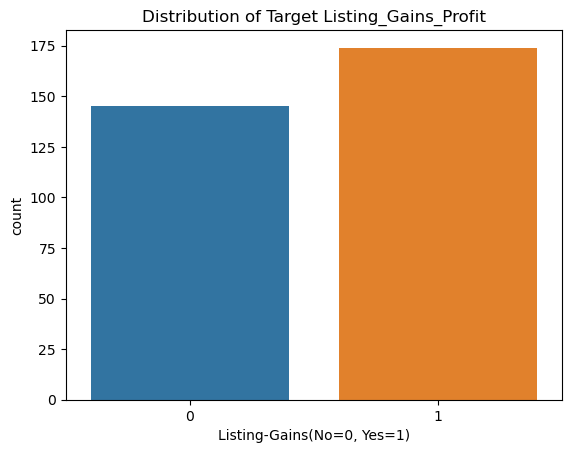

In [ ]:
#Creating count plot - DIstribution of the target variable (Categorical Data)

sns.countplot(df, x='Listing_Gains_Profit').set(title='Distribution of Target Listing_Gains_Profit', xlabel='Listing-Gains(No=0, Yes=1)')
plt.show()

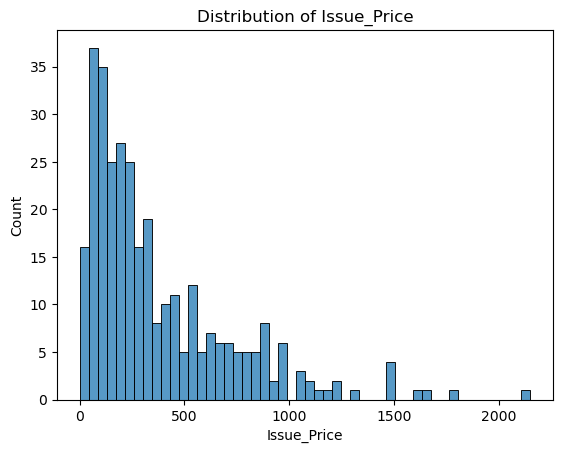

In [ ]:
#plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

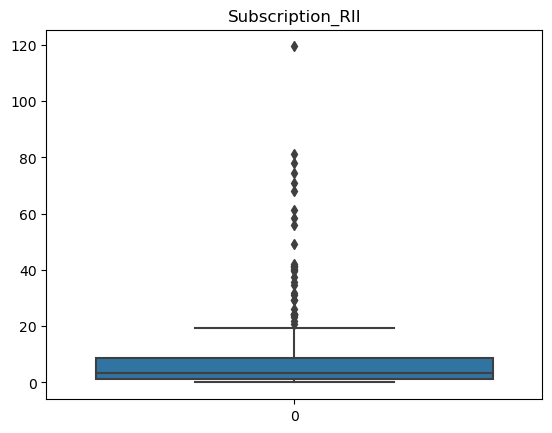

In [ ]:
# Creating Box Plot for investogating outliers

# sns.boxplot(df['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII'], orient='h')
sns.boxplot(df['Subscription_RII']).set(title='Subscription_RII', )
#plt.title('Subscription_RII')
plt.show()

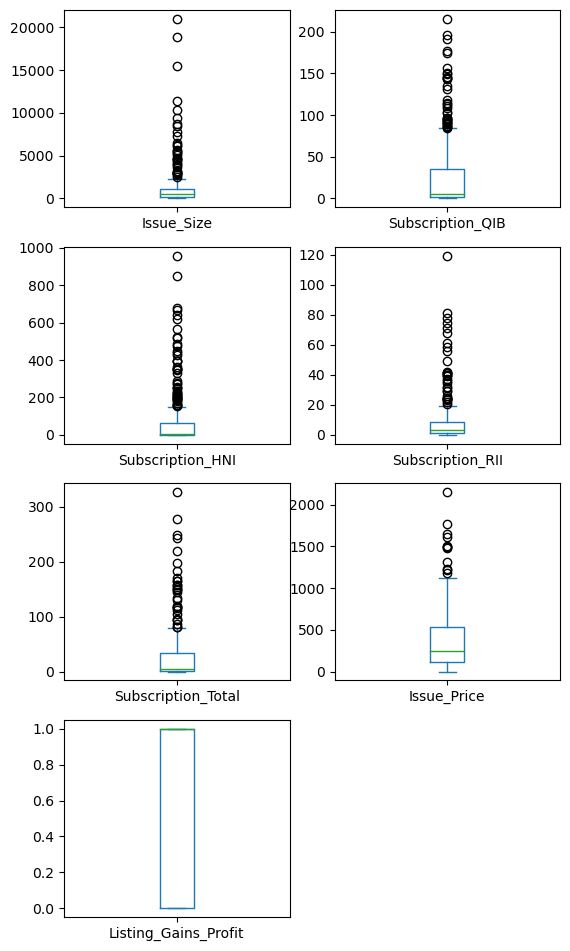

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False)
#plt.subplots_adjust(bottom=2)
plt.subplots_adjust(top=2)
plt.show()

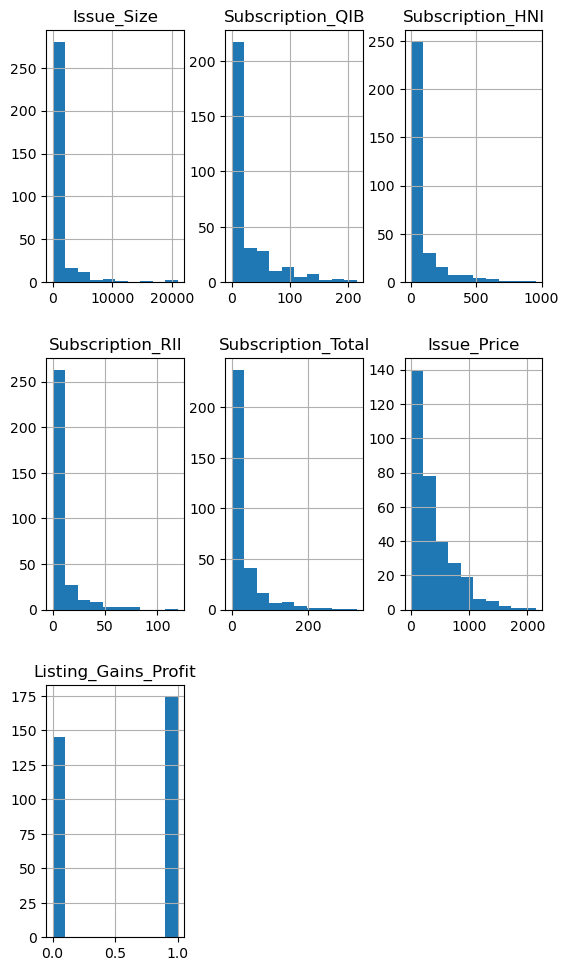

In [ ]:
df.hist()
plt.subplots_adjust(top=2)
plt.show()

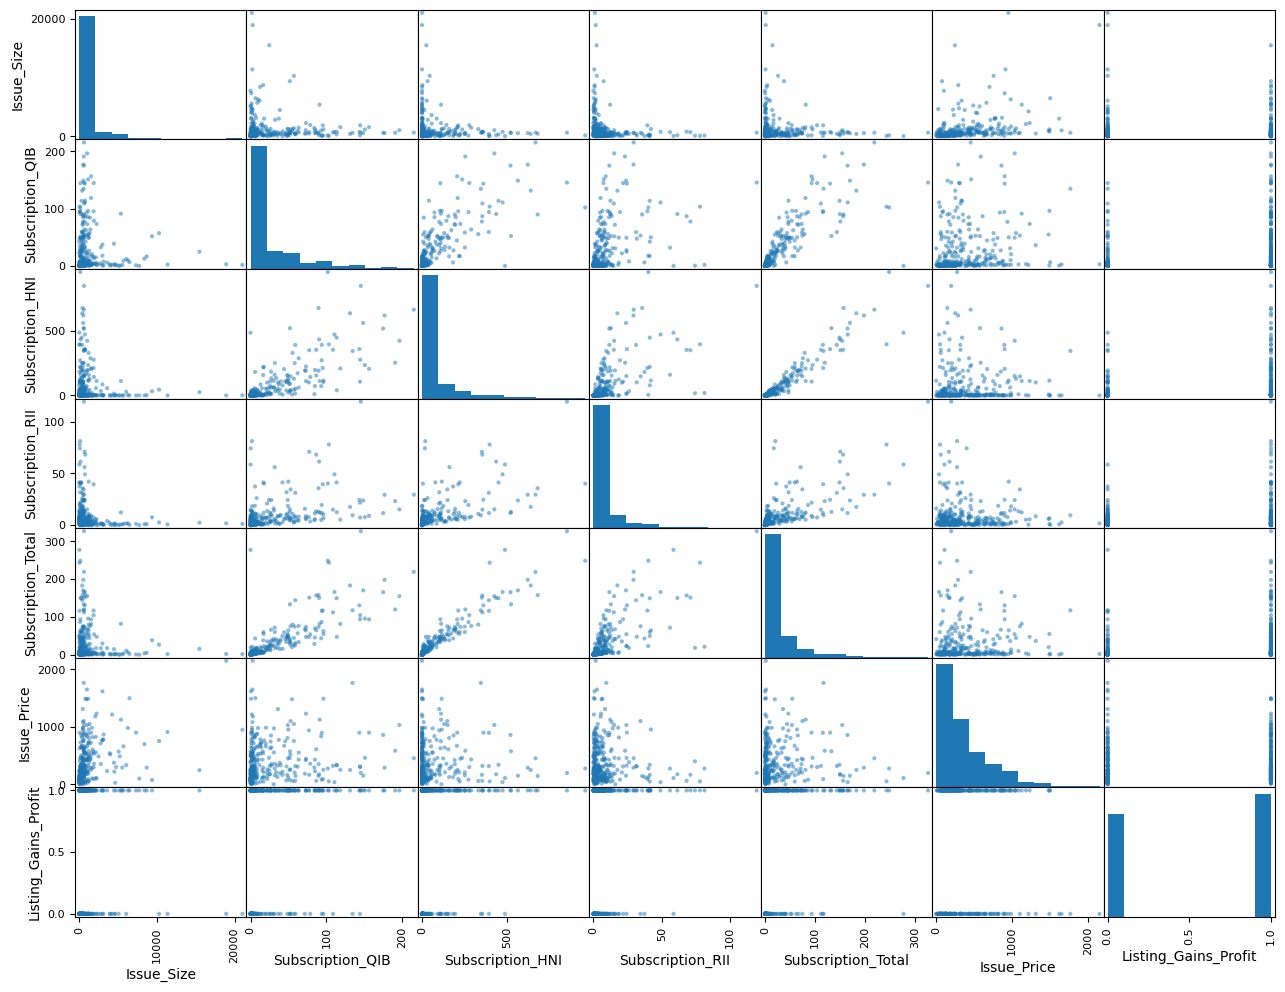

In [ ]:
pd.plotting.scatter_matrix(df)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
#plt.xlabel('xlabel', fontsize=5)
plt.show()

In [ ]:
#Printing Skewness

print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


All the predictor variables are having skewness values beyond +1 to -1.

### Data Preprocessing
#### Outlier Removal

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)


In [ ]:
print(q1)

Issue_Size              169.005
Subscription_QIB          1.150
Subscription_HNI          1.255
Subscription_RII          1.275
Subscription_Total        1.645
Issue_Price             119.000
Listing_Gains_Profit      0.000
Name: 0.25, dtype: float64


In [ ]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [ ]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [ ]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [ ]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [ ]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [ ]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [ ]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [ ]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [ ]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [ ]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

Outliers are removed using 

#### Setting Target and Predictor Variables

In [ ]:
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(df.columns))-set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.084067,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.149383,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.005038,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.015100,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.102285,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the data exploration, the outliers were removed from the respective columns. The predictors are segregated into a separate list, excluding Listing_Gains_Profit. During data exploration, we observed that the distribution of the variables differed significantly. Hence, noralization so the predictors are done.

## Data Analysis

### Creating Model Validation Approach

In [ ]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


Holdout validation approach is used here for model validation. The data is segregated into 70:30 between train and test dataset.

### Deeplearning Classification Model

In [ ]:
#define model
tf.random.set_seed(100)
model = tf.keras.Sequential() #instantiating model
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation = 'relu' ))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#Compile and Train the Model
optimizer=tf.keras.optimizers.Adam(0.001)
loss=tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])



In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                224       
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 8)                 136       
                                                                 
 dense_48 (Dense)            (None, 4)                 36        
                                                                 
 dense_49 (Dense)            (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs = 350)

Epoch 1/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5336
Epoch 2/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5874
Epoch 3/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5516
Epoch 4/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5785
Epoch 5/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5695
Epoch 6/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5695
Epoch 7/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5695
Epoch 8/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5650
Epoch 9/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6009
Epoch 10/350
7/7 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6368
Epoch 11/350
7/7 [===========

In [ ]:
#model Evaluation
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7265


[0.5044823884963989, 0.726457417011261]

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7083


[0.6645117402076721, 0.7083333134651184]

![image.png](attachment:cf40a551-90c8-473a-a074-e134c4dfd379.png)

Initially, it is observed that there is significant difference between train and test data set. The accuracy is lesser in test dataset compared to training dataset. Hence, the model is overfit. It needs further tunning.


In [ ]:
After fine tunning the model, accuracy of around 72% and 71% is observed for train and test dataset 

### Possible Next Steps
Areas to expand on:
- Here, only deeplearning model is used for predictions.
- Spot cheking other Machine Learning Algorithms should be done to improve accuracy of predictions.